# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [79]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

557

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#create an empty list to store API Data
City_Name = []
Lat = []
Lng = []
Max_temp = []
Humidity = []
Cloudiness = []
Wind_speed = []
Country = []
Date = []

# Start the log counter 
Log = 1


print("Beginning Data Retrieval")
print("-------------------------------")

#loop through cities to add to list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        City_Name.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Record = response["name"]
        print(f"Processing Record {Log} | {Record}")
        
        
        # Increase counter by one 
        Log= Log + 1
        
    
        time.sleep(2.00)
    
    # 
    # If no record found go to the next one
    except:
        print("City not found. Skipping...")
    continue
    
print("-------------------------------")
print("Data Retrival Complete")



Beginning Data Retrieval
-------------------------------
Processing Record 1 | Sakakah
Processing Record 2 | Chokurdakh
Processing Record 3 | Saint-Philippe
City not found. Skipping...
Processing Record 4 | Matagami
Processing Record 5 | Saskylakh
Processing Record 6 | Albany
Processing Record 7 | Prince Rupert
Processing Record 8 | Atambua
Processing Record 9 | Sørland
Processing Record 10 | Hervey Bay
Processing Record 11 | Vaini
Processing Record 12 | Ponta do Sol
Processing Record 13 | Sola
City not found. Skipping...
Processing Record 14 | Hamilton
Processing Record 15 | Ciudad Bolivar
Processing Record 16 | Yellowknife
Processing Record 17 | Korla
Processing Record 18 | Port Keats
Processing Record 19 | Morón de la Frontera
Processing Record 20 | Nioro
Processing Record 21 | Ludvika
Processing Record 22 | Ushuaia
Processing Record 23 | Busselton
Processing Record 24 | Immokalee
City not found. Skipping...
Processing Record 25 | Kieta
Processing Record 26 | Torbay
Processing Recor

Processing Record 229 | Pacific Grove
Processing Record 230 | Paamiut
Processing Record 231 | Salalah
Processing Record 232 | Provideniya
Processing Record 233 | Kenai
Processing Record 234 | Belmonte
Processing Record 235 | Dodge City
Processing Record 236 | Bambous Virieux
City not found. Skipping...
City not found. Skipping...
Processing Record 237 | Broome
Processing Record 238 | Chui
Processing Record 239 | Koshurnikovo
Processing Record 240 | Tuktoyaktuk
Processing Record 241 | The Valley
Processing Record 242 | Faya
City not found. Skipping...
Processing Record 243 | La Rioja
Processing Record 244 | Anchorage
Processing Record 245 | Anadyr
Processing Record 246 | Hualmay
Processing Record 247 | Mokokchūng
Processing Record 248 | Qasigiannguit
Processing Record 249 | Arrecife
Processing Record 250 | Stara Syniava
Processing Record 251 | Batemans Bay
Processing Record 252 | Cayenne
City not found. Skipping...
City not found. Skipping...
Processing Record 253 | Saint-Pierre
Process

Processing Record 453 | Filottrano
Processing Record 454 | Olafsvik
Processing Record 455 | Nongpoh
Processing Record 456 | Muravlenko
Processing Record 457 | Binga
Processing Record 458 | Barabai
Processing Record 459 | São Filipe
Processing Record 460 | Morondava
Processing Record 461 | Esperance
City not found. Skipping...
Processing Record 462 | Hambantota
Processing Record 463 | Hithadhoo
Processing Record 464 | Moerai
Processing Record 465 | Kampot
Processing Record 466 | São José do Rio Pardo
Processing Record 467 | Berdigestyakh
Processing Record 468 | Altay
Processing Record 469 | Pingyi
Processing Record 470 | Birao
Processing Record 471 | Matara
Processing Record 472 | Iquique
Processing Record 473 | Kralendijk
Processing Record 474 | Simbahan
Processing Record 475 | Kyzyl-Suu
Processing Record 476 | Sanbu
Processing Record 477 | Goderich
Processing Record 478 | Diu
Processing Record 479 | Ostrovnoy
Processing Record 480 | Karaton
Processing Record 481 | Châtellerault
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
weather={"City":City_Name,
         "Lat":Lat,
         "Lng":Lng,
         "Max Temp":Max_temp,
         "Humidity":Humidity,
         "Cloudiness":Cloudiness,
         "Wind Speed":Wind_speed,
          "Country":Country,
         "Date":Date}

weather_df=pd.DataFrame(weather)
print(weather_df.count())
weather_df.head()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sakakah,29.97,40.21,93.20,8,0,10.29,SA,1592417631
1,Chokurdakh,70.63,147.92,63.43,50,27,10.11,RU,1592417489
2,Saint-Philippe,-21.36,55.77,69.80,88,75,26.40,RE,1592417393
3,Matagami,49.75,-77.63,86.00,45,1,12.75,CA,1592417637
4,Saskylakh,71.92,114.08,54.55,57,10,11.18,RU,1592417576


In [20]:
weather_df.to_csv('Output/weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
humidity =weather_df.loc[weather_df["Humidity"] > 100, :]
humidity
#no country with humidity over 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

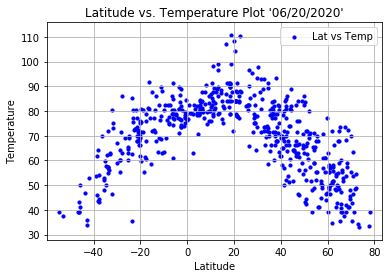

In [124]:
lattitude=weather_df["Lat"]
temperature=weather_df["Max Temp"]
plt.scatter(lattitude,temperature,marker="o",color="b",s=10,label="Lat vs Temp")
plt.grid(True)
plt.title("Latitude vs. Temperature Plot '06/20/2020'")
plt.legend(loc="upper right")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(temperature)-5,max(temperature)+5)
plt.savefig("Output_PNG/Latitude_vs._Temperature_Plot.PNG")
plt.show()

#this graph checks wether there's a relationship between latitutde the temperature.
#if there's posititve correlation, it means the higher the lattitude, the higher the max temperature of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the max temperature of the city. otherwise there's no relationship.


## Latitude vs. Humidity Plot

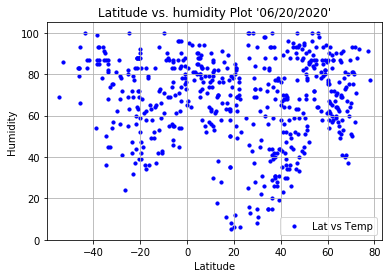

In [54]:

lattitude=weather_df["Lat"]
humidity=weather_df["Humidity"]
plt.scatter(lattitude,humidity,marker="o",color="b",s=10,label="Lat vs Temp")
plt.grid(True)
plt.title("Latitude vs. humidity Plot '06/20/2020'")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(humidity)-5,max(humidity)+5)
plt.savefig("Output_PNG/Latitude_vs._Humidity.PNG")
plt.show()
#this graph checks wether there's a relationship between latitutde the humidity
#if there's posititve correlation, it means the higher the lattitude, the higher the humidity of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the humidity of the city. otherwise there's no relationship.


## Latitude vs. Cloudiness Plot

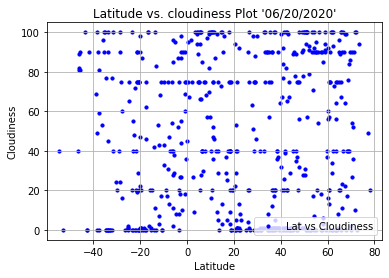

In [55]:
lattitude=weather_df["Lat"]
cloudiness=weather_df["Cloudiness"]
plt.scatter(lattitude,cloudiness,marker="o",color="b",s=10,label="Lat vs Cloudiness")
plt.grid(True)
plt.title("Latitude vs. cloudiness Plot '06/20/2020'")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(cloudiness)-5,max(cloudiness)+5)
plt.savefig("Output_PNG/Latitude_vs._Cloudiness.PNG")
plt.show()
#this graph checks wether there's a relationship between latitutde the cloudiness
#if there's posititve correlation, it means the higher the lattitude, the higher the cloudiness of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the cloudiness of the city. otherwise there's no relationship.



## Latitude vs. Wind Speed Plot

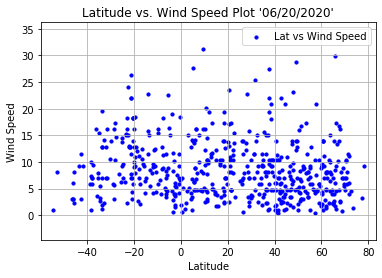

In [56]:
lattitude=weather_df["Lat"]
wind_speed=weather_df["Wind Speed"]
plt.scatter(lattitude,wind_speed,marker="o",color="b",s=10,label="Lat vs Wind Speed")
plt.grid(True)
plt.title("Latitude vs. Wind Speed Plot '06/20/2020'")
plt.legend(loc="upper right")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(wind_speed)-5,max(wind_speed)+5)
plt.savefig("Output_PNG/Latitude_vs._Wind_Speed_Plot.PNG")
plt.show()
#this graph checks wether there's a relationship between latitutde the Wind Speed
#if there's posititve correlation, it means the higher the lattitude, the higher the Wind Speed of the city. 
# if there's negative correlation, it means the higher the lattitude, the lower the Wind Speed of the city. otherwise there's no relationship.



## Linear Regression

In [81]:
# Create Northern and Southern Hemisphere DataFrames
Northern =weather_df.loc[weather_df["Lat"]>=0,:]
Southern=weather_df.loc[weather_df["Lat"]<0, :]
Northern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sakakah,29.97,40.21,93.20,8,0,10.29,SA,1592417631
1,Chokurdakh,70.63,147.92,63.43,50,27,10.11,RU,1592417489
3,Matagami,49.75,-77.63,86.00,45,1,12.75,CA,1592417637
4,Saskylakh,71.92,114.08,54.55,57,10,11.18,RU,1592417576
5,Albany,42.60,-73.97,86.00,30,0,2.68,US,1592417380
...,...,...,...,...,...,...,...,...,...
545,Ust-Kuyga,70.02,135.60,69.85,51,2,7.00,RU,1592418769
546,Beidao,34.57,105.89,58.48,75,0,1.92,CN,1592418772
547,Sobolevo,54.43,31.90,65.55,83,0,6.82,RU,1592418774
548,Baykit,61.67,96.37,50.49,72,100,2.93,RU,1592418776


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

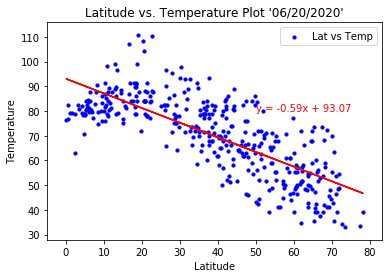

The R squared is 0.5823605481839901


In [163]:
lattitude=Northern["Lat"]
temperature=Northern["Max Temp"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, temperature)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,temperature,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Temperature Plot '06/20/2020'")
plt.annotate(line_equation,(20,30),xytext=(50, 80),fontsize=10,color="red")
plt.legend(loc="upper right")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(temperature)-5,max(temperature)+5)
plt.savefig("Output_PNG/Northern_Latitude_vs._Temperature_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

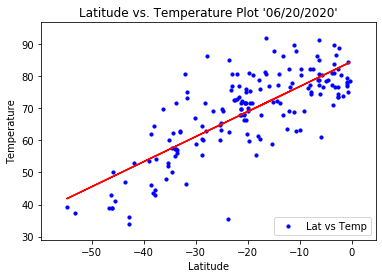

The R squared is 0.6075999055169525


In [157]:
lattitude=Southern["Lat"]
temperature=Southern["Max Temp"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, temperature)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,temperature,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Temperature Plot '06/20/2020'")
plt.annotate(line_equation,(40,50),xytext=(-30, 50),fontsize=1,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(temperature)-5,max(temperature)+5)
plt.savefig("Output_PNG/Southern_Latitude_vs._Temperature_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

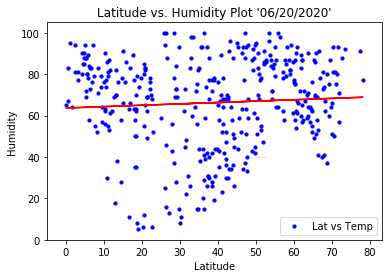

The R squared is 0.003842710877450862


In [173]:
lattitude=Northern["Lat"]
humidity=Northern["Humidity"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, humidity)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,humidity,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Humidity Plot '06/20/2020'")
plt.annotate(line_equation,(50,80),xytext=(50, 40),fontsize=1,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(humidity)-5,max(humidity)+5)
plt.savefig("Output_PNG/Northern_Latitude_vs._Humidity_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

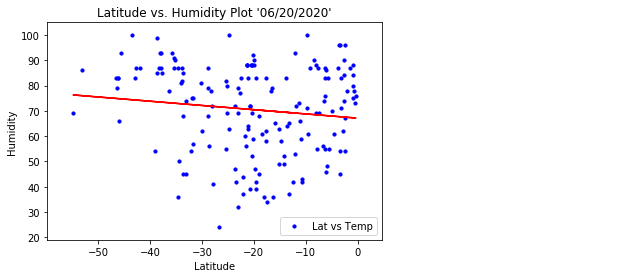

The R squared is 0.015471303682019325


In [147]:
lattitude=Southern["Lat"]
humidity=Southern["Humidity"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, humidity)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,humidity,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Humidity Plot '06/20/2020'")
plt.annotate(line_equation,(50,60),xytext=(50, 80),fontsize=1,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(humidity)-5,max(humidity)+5)
plt.savefig("Output_PNG/Southern_Latitude_vs._Humidity_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

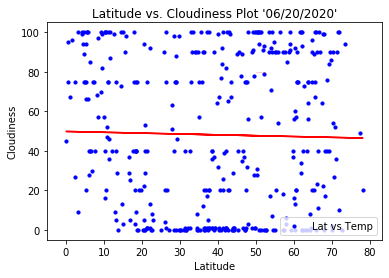

The R squared is 0.0005176116248173593


In [164]:
lattitude=Northern["Lat"]
cloudiness=Northern["Cloudiness"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, cloudiness)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,cloudiness,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Cloudiness Plot '06/20/2020'")
plt.annotate(line_equation,(50,60),xytext=(50, 80),fontsize=1,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(cloudiness)-5,max(cloudiness)+5)
plt.savefig("Output_PNG/Northern_Latitude_vs._Cloudiness_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

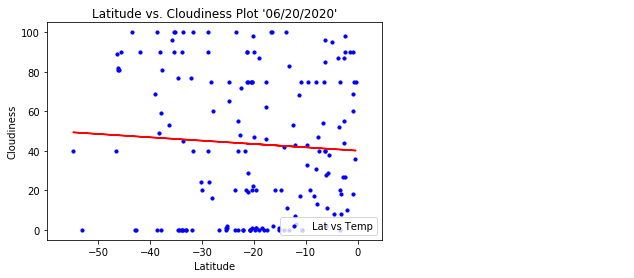

The R squared is 0.003777727497531335


In [149]:
lattitude=Southern["Lat"]
cloudiness=Southern["Cloudiness"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, cloudiness)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,cloudiness,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Cloudiness Plot '06/20/2020'")
plt.annotate(line_equation,(50,60),xytext=(50, 80),fontsize=1,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(cloudiness)-5,max(cloudiness)+5)
plt.savefig("Output_PNG/Souththern_Latitude_vs._Cloudiness_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

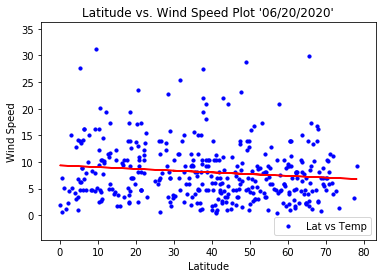

The R squared is 0.015086334056538326


In [165]:
lattitude=Northern["Lat"]
wind_speed=Northern["Wind Speed"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, wind_speed)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,wind_speed,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Wind Speed Plot '06/20/2020'")
plt.annotate(line_equation,(50,60),xytext=(50, 30),fontsize=1,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(wind_speed)-5,max(wind_speed)+5)
plt.savefig("Output_PNG/Northern_Latitude_vs._Wind_Speed_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

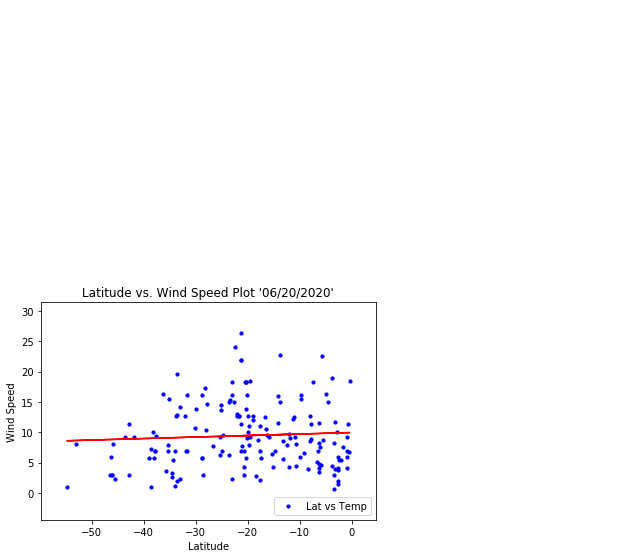

The R squared is 0.0036187262747553787


In [151]:
lattitude=Southern["Lat"]
wind_speed=Southern["Wind Speed"]
#regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(lattitude, wind_speed)
regress_values = lattitude * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot
plt.scatter(lattitude,wind_speed,marker="o",color="b",s=10,label="Lat vs Temp")
plt.plot(lattitude,regress_values,"r-")
#format
plt.title("Latitude vs. Wind Speed Plot '06/20/2020'")
plt.annotate(line_equation,(50,60),xytext=(50, 80),fontsize=1,color="red")
plt.legend(loc="lower right")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(min(lattitude)-5, max(lattitude)+5)
plt.ylim(min(wind_speed)-5,max(wind_speed)+5)
plt.savefig("Output_PNG/Southern_Latitude_vs._Wind_Speed_Plot.PNG")
plt.show()
rsquared=rvalue**2
print(f"The R squared is {rsquared}")